# Exercici 2.2. Visualització de dades sobre dataset tips.

Importa seaborn com a sns, matplotlib.pyplot com a plt i aplica %matplotlib inline

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

Importa el dataset de seaborn 'tips'. Anomena'l tips_df

In [18]:
# Load the 'tips' dataset and show the first rows
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Genera un pairplot per examinar les relacions entre variables numèriques.

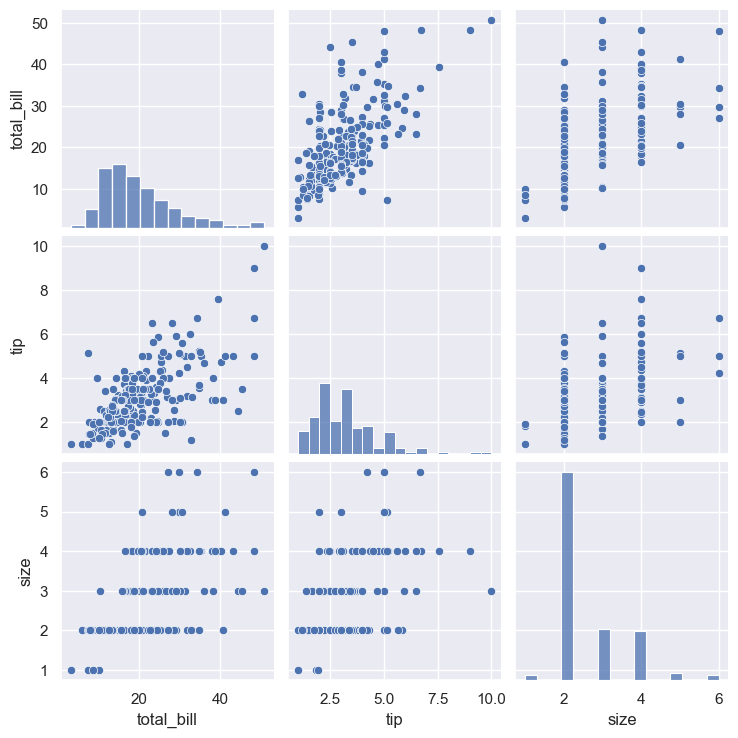

In [19]:
# Pairplot for numeric relationships
sns.pairplot(tips_df)
plt.show()

Repeteix el pairplot, però afegeix hue='sex' per diferenciar homes i dones.

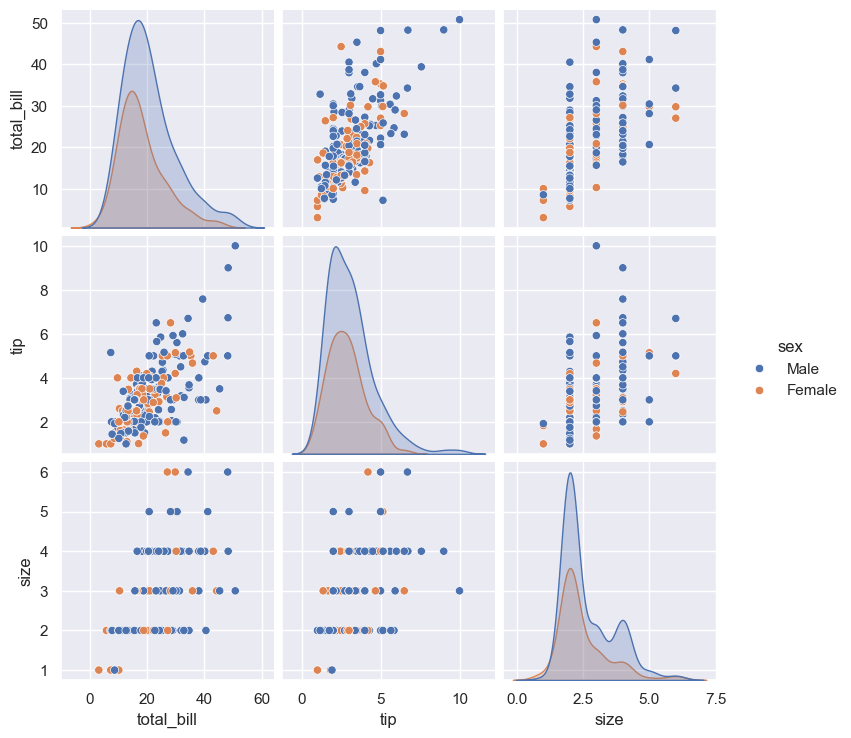

In [20]:
# Pairplot colored by sex
sns.pairplot(tips_df, hue='sex')
plt.show()

Mostra un displot sobre la columna total_bill per veure la distribució de la despesa total.

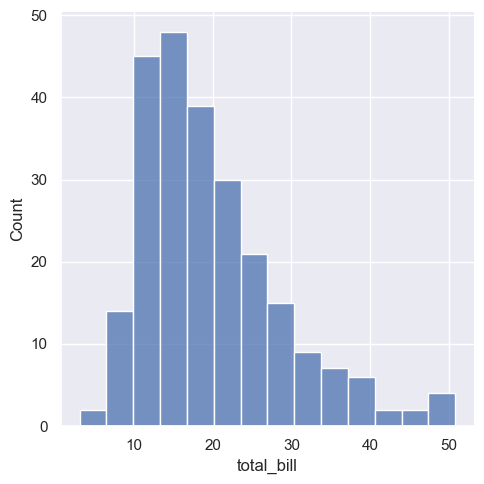

In [21]:
# Distribution of total bill
sns.displot(tips_df, x='total_bill')
plt.show()

Mostra un displot sobre tip amb 30 bins i kde=True.

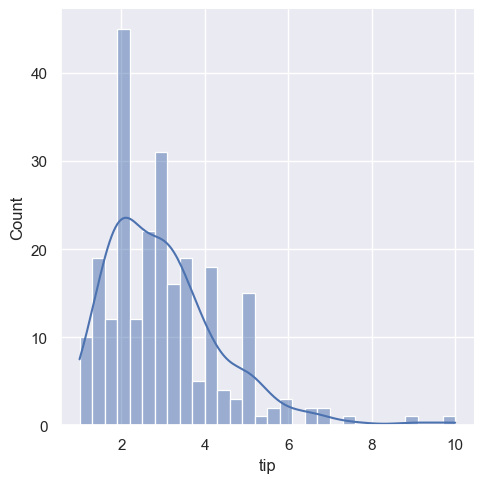

In [22]:
# Distribution of tip with 30 bins and KDE
sns.displot(tips_df, x='tip', bins=30, kde=True)
plt.show()

Fes un jointplot amb:

x = total_bill

y = tip

hue = time

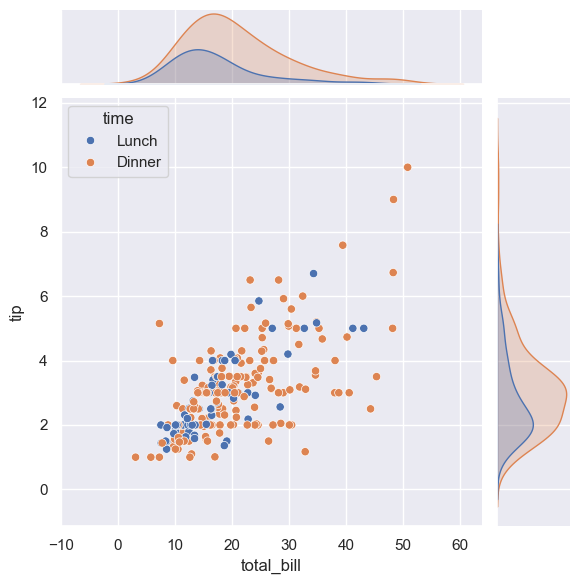

In [23]:
# Jointplot of total_bill vs tip colored by time
sns.jointplot(data=tips_df, x='total_bill', y='tip', hue='time')
plt.show()

Canvia la mida de la figura a (10,6) i crea un boxplot per comparar total_bill segons el day.

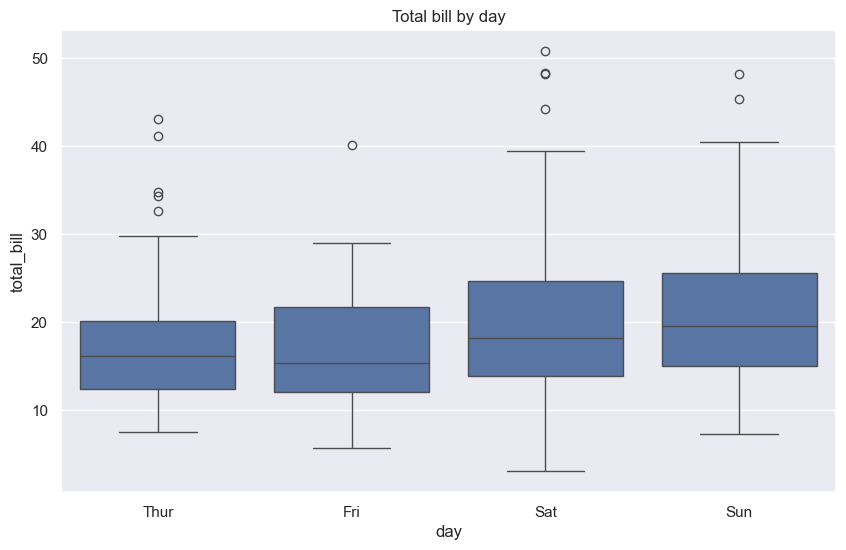

In [24]:
# Boxplot of total_bill by day with figure size (10,6)
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', data=tips_df)
plt.title('Total bill by day')
plt.show()

Canvia la mida a (12,7) i crea un violinplot amb x='sex', y='tip', hue='smoker'.

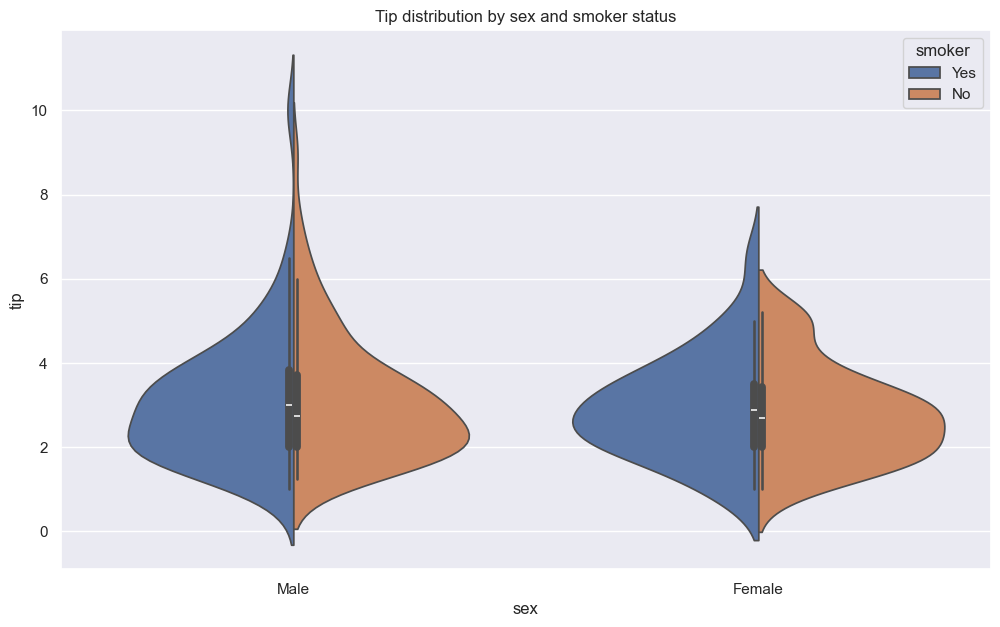

In [25]:
# Violinplot x='sex', y='tip', hue='smoker' with figure size (12,7)
plt.figure(figsize=(12,7))
sns.violinplot(x='sex', y='tip', hue='smoker', data=tips_df, split=True)
plt.title('Tip distribution by sex and smoker status')
plt.show()

Calcula la correlació entre les columnes numèriques:

In [26]:
# Correlation between numeric columns (use only numeric dtypes to avoid string/category conversion errors)
corr = tips_df.select_dtypes(include=['number']).corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Mostra un heatmap de correlacions amb:

cmap='coolwarm'

annot=True

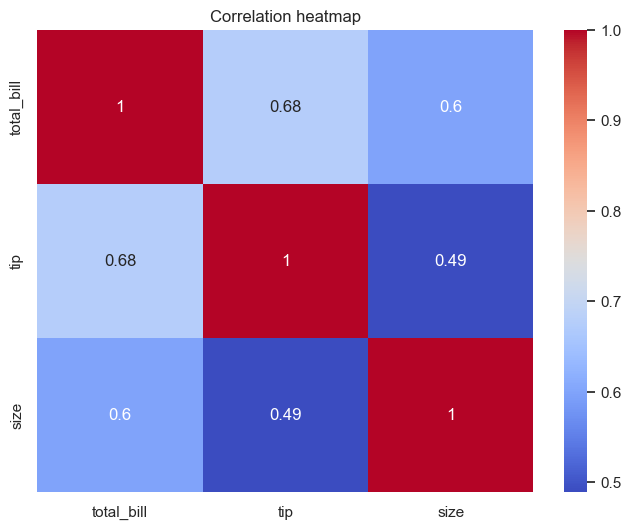

In [27]:
# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation heatmap')
plt.show()

Conserva sols els atributs i anomena'l simple_df:

In [28]:
# Keep only the main attributes (numeric) and name it simple_df
simple_df = tips_df[['total_bill', 'tip', 'size']].copy()
simple_df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


Arrodoneix:

total_bill a la desena més propera (10, 20, 30, etc.)

tip a la unitat més propera

In [29]:
# Round total_bill to the nearest 10 and tip to the nearest unit
simple_df = simple_df.copy()
simple_df['total_bill'] = simple_df['total_bill'].round(-1)
simple_df['tip'] = simple_df['tip'].round(0)
simple_df.head()

,total_bill,tip,size
0,20.0,1.0,2
1,10.0,2.0,3
2,20.0,4.0,3
3,20.0,3.0,2
4,20.0,4.0,4


Index = size, columnes = total_bill, valors = tip

In [30]:
# Pivot table with index=size, columns=total_bill, values=tip (mean)
pivot = simple_df.pivot_table(index='size', columns='total_bill', values='tip', aggfunc='mean')
pivot

total_bill,0.0,10.0,20.0,30.0,40.0,50.0
size,,,,,,
1,1.0,1.666667,NaN,NaN,NaN,NaN
2,NaN,2.081081,3.000000,3.230769,3.000000,NaN
3,NaN,2.000000,3.041667,4.000000,3.666667,7.0
4,NaN,NaN,3.062500,4.538462,4.833333,8.0
5,NaN,NaN,5.000000,3.333333,5.000000,NaN
6,NaN,NaN,NaN,5.333333,NaN,5.0


Fes un heatmap amb cmap='magma' per visualitzar les propines mitjanes segons mida de taula i import total.

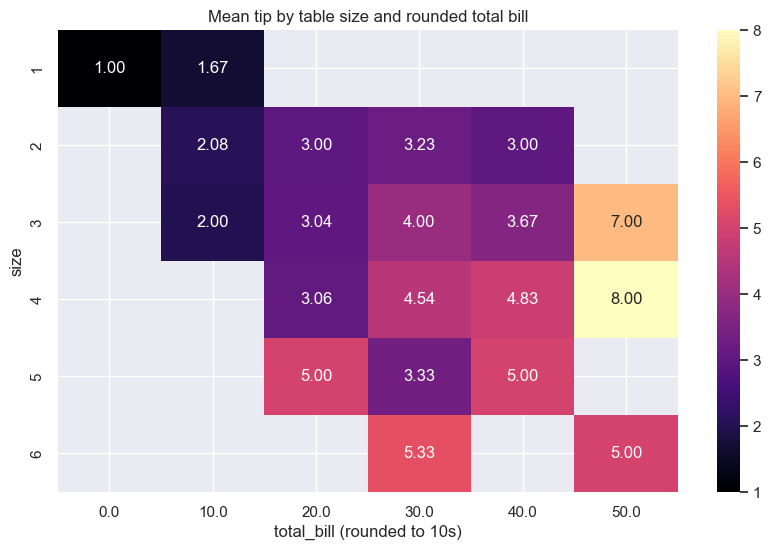

In [31]:
# Heatmap of mean tips by table size and total_bill (using magma cmap)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='magma', annot=True, fmt='.2f')
plt.title('Mean tip by table size and rounded total bill')
plt.ylabel('size')
plt.xlabel('total_bill (rounded to 10s)')
plt.show()